# Library&Package Import

In [1]:
import pandas as pd
import numpy as np

# Read Dataset

In [2]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,100217,1995,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,100220,1474,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,100755,4862,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,100880,1915,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,100887,22831,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,9601,1097,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,9601,2067,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,9602,1686,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,9606,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


# Normalization

In [3]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['Unnamed: 0', 'DNAtype', 'Kingdom', 'SpeciesID', 'Ncodons'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

# PCA

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)  
x_scaled = pca.fit_transform(x_scaled) 
pca.explained_variance_ratio_

array([0.35063693, 0.20579774, 0.05714541, 0.03743534, 0.03364339,
       0.03175275, 0.02082732, 0.01942239, 0.01539283, 0.01361264])

Text(0.5, 1.0, 'Principal component V.S. Percentage of variance explained')

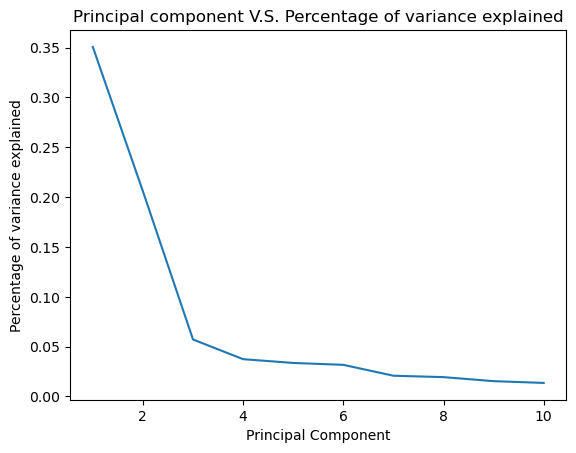

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.title('Principal component V.S. Percentage of variance explained')

# Data split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 10) (2593, 10) (10369,) (2593,)


# BernoulliNB

# Cross validation

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.713437, 0.223619, 0.062944],],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.5, 'binarize': 0.0, 'class_prior': [0.713437, 0.223619, 0.062944], 'fit_prior': True}
Best Accuracy Through Grid Search : 0.890



# Best model

In [14]:
best_params = {'alpha': 0.5, 'binarize': 0.0, 'class_prior': [0.713437, 0.223619, 0.062944], 'fit_prior': True}
best_model = BernoulliNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='macro')


print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)


accuracy_score:  0.8908600077130736
precision_score:  0.8907930704710945
recall_score:  0.8908600077130736
f1_score:  0.8103396853075925


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[1732   76   51]
 [ 103  472    4]
 [  43    6  106]]

Classification report :
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1859
           1       0.85      0.82      0.83       579
           2       0.66      0.68      0.67       155

    accuracy                           0.89      2593
   macro avg       0.81      0.81      0.81      2593
weighted avg       0.89      0.89      0.89      2593

auc_score:  0.971272387490505


# GuassianNB

In [17]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train)
gaussian_nb.class_prior_

array([0.71250844, 0.22374385, 0.06374771])

In [18]:
params = {
            'priors': [None, [0.713437, 0.223619, 0.062944],],
            'var_smoothing': [1e-9, 1e-6, 1e-12],
         }

gaussian_nb_grid = GridSearchCV(GaussianNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
gaussian_nb_grid.fit(x_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(gaussian_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gaussian_nb_grid.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Accuracy Through Grid Search : 0.958
Best Parameters : {'priors': [0.713437, 0.223619, 0.062944], 'var_smoothing': 1e-09}



In [19]:
best_params = {'priors': [0.713437, 0.223619, 0.062944], 'var_smoothing': 1e-09}
best_model = GaussianNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.959892016968762
precision_score:  0.910452526016594
recall_score:  0.9162476138112234
f1_score:  0.9133058561776838


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[1808   19   32]
 [  25  554    0]
 [  23    5  127]]

Classification report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1859
           1       0.96      0.96      0.96       579
           2       0.80      0.82      0.81       155

    accuracy                           0.96      2593
   macro avg       0.91      0.92      0.91      2593
weighted avg       0.96      0.96      0.96      2593

auc_score:  0.9900012754957498


# No PCA

In [34]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['Unnamed: 0', 'DNAtype', 'Kingdom', 'SpeciesID', 'Ncodons'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 64) (2593, 64) (10369,) (2593,)


# ComplementNB

In [45]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()
complement_nb.fit(x_train, y_train)

ComplementNB()

In [46]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'norm': [True, False],
          'class_prior': [None, [0.713437, 0.223619, 0.062944], ]
         }

complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(x_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(complement_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(complement_nb_grid.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Accuracy Through Grid Search : 0.934
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True, 'norm': False}



In [47]:
best_params = {'alpha': 10.0, 'class_prior': None, 'fit_prior': True, 'norm': False}
best_model = ComplementNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.9321249517932896
precision_score:  0.8721361975405876
recall_score:  0.7886037947846702
f1_score:  0.8147891850813923


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[1781   37   22]
 [  23  563    0]
 [  65   29   73]]

Classification report :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1840
           1       0.90      0.96      0.93       586
           2       0.77      0.44      0.56       167

    accuracy                           0.93      2593
   macro avg       0.87      0.79      0.81      2593
weighted avg       0.93      0.93      0.93      2593

auc_score:  0.9808822923312738


# MultinomialNB

In [50]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train, y_train)
multinomial_nb.class_log_prior_

array([-0.33639509, -1.5002752 , -2.77114315])

In [51]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.713437, 0.223619, 0.062944], ]
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(x_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.923
Best Parameters : {'alpha': 0.01, 'class_prior': [0.713437, 0.223619, 0.062944], 'fit_prior': True}



In [52]:
best_params = {'alpha': 0.01, 'class_prior': [0.713437, 0.223619, 0.062944], 'fit_prior': True}
best_model = MultinomialNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.9240262244504435
precision_score:  0.8325720374661888
recall_score:  0.7075878440477704
f1_score:  0.7436626858791268


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[1834    0    6]
 [  41  523   22]
 [ 128    0   39]]

Classification report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.95      1840
           1       1.00      0.89      0.94       586
           2       0.58      0.23      0.33       167

    accuracy                           0.92      2593
   macro avg       0.83      0.71      0.74      2593
weighted avg       0.91      0.92      0.91      2593

auc_score:  0.9804335803418694
